In [1]:
# Install Libs
#! pip install python-binance

# Source / Documentation : 
# https://github.com/sammchardy/python-binance/tree/master

In [2]:
from binance.client import Client
import pandas as pd
import matplotlib.pyplot as plt

---

In [3]:
# Example usage (Date Format: Year-Month-Day)
ticker = 'ETHUSDT'
start_date = '2022-01-1'
end_date = '2022-01-5'
interval = '1m' #1m -> minutes; h -> hours; d -> days; w -> weeks; M -> months

In [4]:
# Creation du client Binance (pas besoin de clé API pour les données historiques)
client = Client('', '')

In [5]:
#Téléchargement des données
klines = client.get_historical_klines(ticker, interval, start_date, end_date)

In [6]:
type(klines)

list

In [7]:
klines[0]

[1640995200000,
 '3676.22000000',
 '3687.05000000',
 '3676.22000000',
 '3684.84000000',
 '504.30200000',
 1640995259999,
 '1856131.65059700',
 749,
 '271.35540000',
 '998619.71581700',
 '0']

In [8]:
# Create a DataFrame from the klines
df = pd.DataFrame(klines, columns=[
                                    'open_time','open', 'high', 'low', 'close',
                                        'volume','close_time', 'dv','num_trades',
                                        'taker_buy_vol','taker_buy_base_vol', 'ignore'
                                ])

# Set Close time to datetime Type and as index
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
df.set_index('close_time', inplace=True)
df.drop(columns=['open_time','ignore'], inplace=True)

# Round close time to normalize
df.index = df.index.round('min')

# Convert columns to float type
df = df.astype(float)

# Print
df.head()

,open,high,low,close,volume,dv,num_trades,taker_buy_vol,taker_buy_base_vol
close_time,,,,,,,,,
2022-01-01 00:01:00,3676.22,3687.05,3676.22,3684.84,504.3020,1.856132e+06,749.0,271.3554,998619.715817
2022-01-01 00:02:00,3684.85,3694.20,3681.33,3691.55,273.0180,1.006818e+06,580.0,181.6745,670095.912422
2022-01-01 00:03:00,3692.50,3694.42,3687.49,3693.62,216.0824,7.976563e+05,460.0,80.1555,295925.007905
2022-01-01 00:04:00,3693.63,3695.41,3689.55,3690.58,250.2232,9.237721e+05,448.0,109.0924,402765.079850
2022-01-01 00:05:00,3690.57,3691.03,3688.00,3690.09,119.8314,4.421674e+05,279.0,55.1763,203588.562778


>Le terme "taker" désigne un participant au marché qui exécute un ordre de marché contre un ordre déjà présent dans le carnet d'ordres. Cela signifie que le taker "prend" de la liquidité existante en achetant ou vendant au prix disponible le plus proche, sans attendre que son ordre soit rempli à un prix spécifique.  
On pourra en déduire des calculs comme le "Taker Volume Imbalance" qui nous renseigne sur le déséquilibre entre les acheteurs et les vendeurs pour avoir une direction a court terme.

---

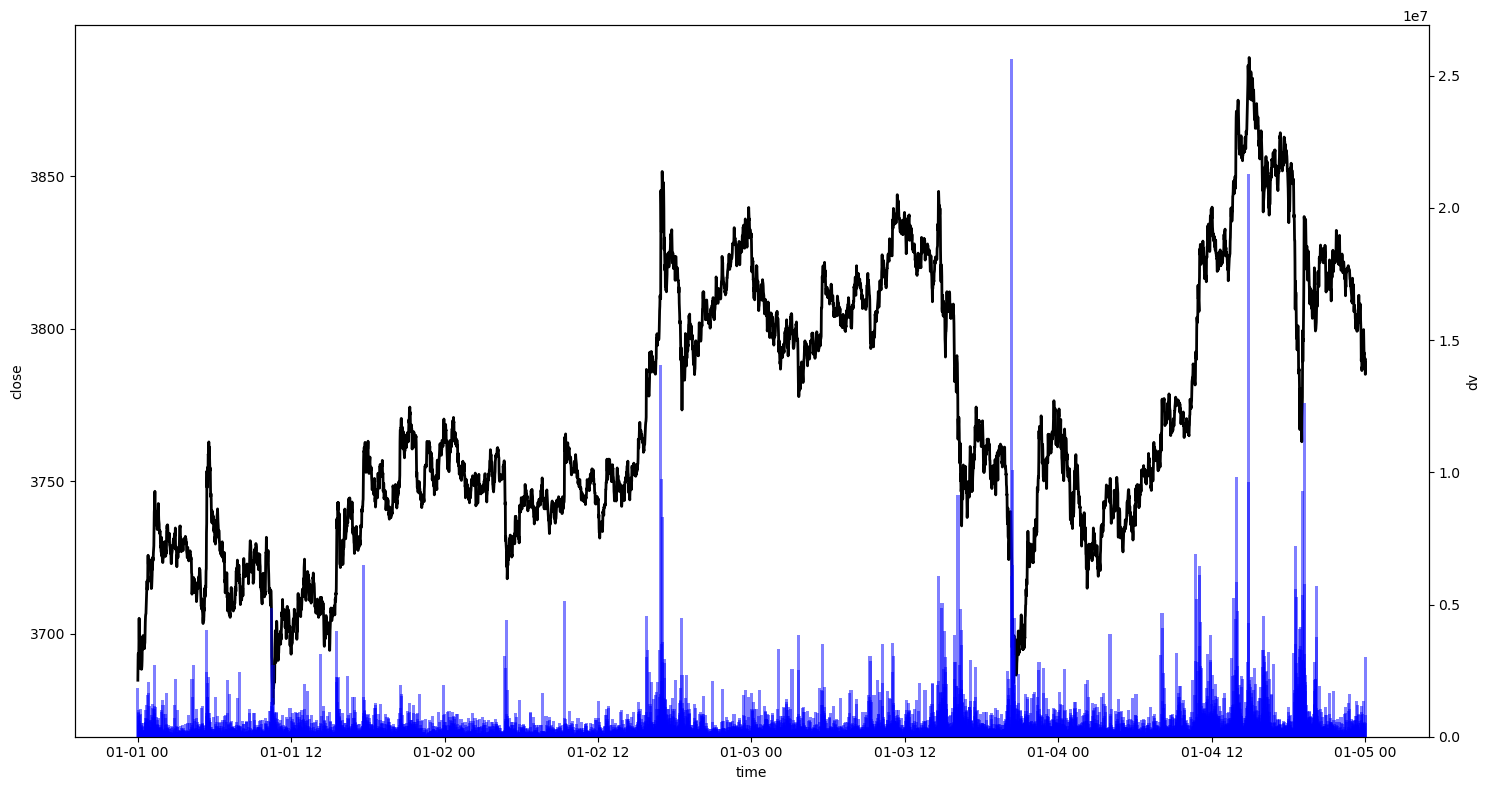

In [9]:
#Affichage du prix 'close' et du volume en dollar 'dv' 
fig, ax1 = plt.subplots(figsize=(15, 8))
#Price
ax1.set_xlabel('time')
ax1.set_ylabel('close')
ax1.plot(df.index, df['close'], color='black', linewidth=2)
ax1.tick_params(axis='y')
#Volume
ax2 = ax1.twinx()
ax2.set_ylabel('dv')
ax2.bar(df.index, df['dv'], color='blue', width=0.01, alpha=0.5)
ax2.tick_params(axis='y')
#Show
fig.tight_layout()
plt.show()

---
Sauvegarde des données

In [10]:
### STORE RAW DATA ###
hdf5filename = ticker + '_' + interval + '_' + start_date + '_' + end_date + '.h5'
df.to_hdf(hdf5filename, key='ohlcv', mode='w')

- Attention aucune vérification des données n'a été faite ! (manquant, doublons, ...)